In [9]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('crop_yield_data.csv')

# Display basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB
None
       rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours  \
count  3000.000000         3000.000000         3000.000000     3000.000000   
mean   1263.095000            5.506667          498.801000        7.995333   
std     432.371756            2.855172          287.122742        2.621501   
min     500.000000            1.000000           10.000000        4.000000   
25%     896.000000            3.000000          242.000000        6.000000   
50%  

In [10]:
print(df.head())

   rainfall_mm  soil_quality_index  farm_size_hectares  sunlight_hours  \
0         1626                   9                 636              11   
1         1959                   9                  73              11   
2         1360                   1                 352               5   
3         1794                   2                 948               7   
4         1630                   5                 884               5   

   fertilizer_kg  crop_yield  
0           1006         404  
1            112         115  
2            702         231  
3            299         537  
4           2733         554  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop missing values or fill them
df = df.dropna()

# Define features and target
features = ['rainfall_mm', 'soil_quality_index', 'farm_size_hectares', 'sunlight_hours', 'fertilizer_kg']
target = 'crop_yield'

X = df[features]
y = df[target]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R² Score: 0.9993582963943481
RMSE: 3.707034723020963


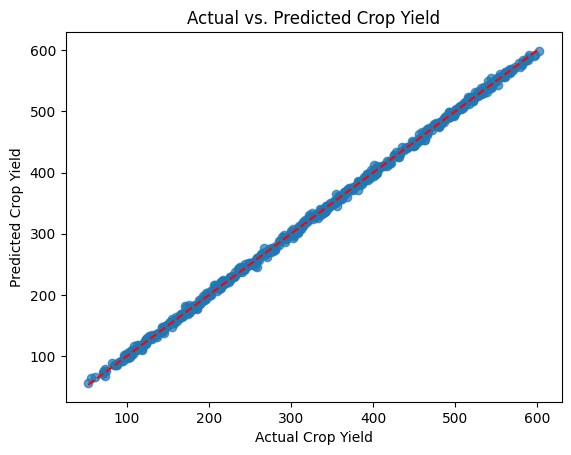

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting actual vs predicted values

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Crop Yield')
plt.ylabel('Predicted Crop Yield')
plt.title('Actual vs. Predicted Crop Yield')
plt.show()
